In [1]:
import os   # import os module
import numpy as np # import numpy module
from keras.models import Sequential # import Sequential module from keras module    
from keras.layers import Activation, Dropout, Flatten, Dense # import Activation, Dropout, Flatten, Dense modules from keras module
from keras.preprocessing.image import ImageDataGenerator    # import ImageDataGenerator module from keras module
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D # import Conv2D, MaxPooling2D, ZeroPadding2D modules from keras module
from keras import optimizers # import optimizers module from keras module
import scipy # import scipy module for image processing and analysis  
import pylab as pl # import pylab module for plotting  
import matplotlib.cm as cm # import matplotlib.cm module for color mapping
%matplotlib inline    

input_shape = (150, 150, 3) # input shape for the model 
img_width, img_height = 150, 150 # input image dimensions for the model 

nb_train_samples = 2000 # number of training samples 
nb_validation_samples = 1000 # number of validation samples
batch_size = 16 # batch size for training 
epochs = 25 # number of epochs for training 




In [2]:
train_data_dir = r'E:\Porject\image_classification\training_set\training_set' # path to training data directory
validation_data_dir = r'E:\Porject\image_classification\test_set\test_set' # path to validation data directory

In [3]:
# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
    rescale = 1./255,              # normalize pixel values to [0,1]
    rotation_range = 30,           # randomly applies rotations
    width_shift_range = 0.3,       # randomly applies width shifting
    height_shift_range = 0.3,      # randomly applies height shifting
    horizontal_flip = True,        # randonly flips the image
    fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

In [4]:
# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:
# Creating out model
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 activation (Activation)     (None, 148, 148, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8000 // batch_size,
    epochs = epochs, #number or epochs.
    validation_data = validation_generator,
    validation_steps = 2000 // batch_size)

C:\Users\dilip\AppData\Local\Temp\ipykernel_4952\429289494.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
500/500 [==============================] - 956s 2s/step - loss: 0.7017 - accuracy: 0.5394 - val_loss: 0.6673 - val_accuracy: 0.5845
Epoch 2/25
500/500 [==============================] - 858s 2s/step - loss: 0.6814 - accuracy: 0.5821 - val_loss: 0.6572 - val_accuracy: 0.6280
Epoch 3/25
500/500 [==============================] - 414s 828ms/step - loss: 0.6676 - accuracy: 0.6162 - val_loss: 1.0303 - val_accuracy: 0.5205
Epoch 4/25
500/500 [==============================] - 407s 815ms/step - loss: 0.6597 - accuracy: 0.6285 - val_loss: 0.6025 - val_accuracy: 0.6880
Epoch 5/25
500/500 [==============================] - 424s 848ms/step - loss: 0.6478 - accuracy: 0.6594 - val_loss: 0.5671 - val_accuracy: 0.7055
Epoch 6/25
500/500 [==============================] - 418s 836ms/step - loss: 0.6310 - accuracy: 0.6642 - val_loss: 0.5760 - val_accuracy: 0.7210
Epoch 7/25
500/500 [==============================] - 439s 879ms/step - loss: 0.6242 - accuracy: 0.6707 - val_loss: 0.5594 - val_a

In [7]:
history.history

{'loss': [0.7017229795455933,
  0.6813649535179138,
  0.667603075504303,
  0.6597033143043518,
  0.6478305459022522,
  0.6309592723846436,
  0.6241933107376099,
  0.6394336223602295,
  0.6107509732246399,
  0.6112760901451111,
  0.6069859266281128,
  0.6110283732414246,
  0.6026839017868042,
  0.592025101184845,
  0.5939557552337646,
  0.5844506621360779,
  0.5842273831367493,
  0.5939117670059204,
  0.5978012681007385,
  0.5937989354133606,
  0.5834678411483765,
  0.5789474248886108,
  0.5678592920303345,
  0.5766964554786682,
  0.5656738877296448],
 'accuracy': [0.539366602897644,
  0.5820503234863281,
  0.6162223219871521,
  0.6284891963005066,
  0.6594066619873047,
  0.6641632318496704,
  0.6706721782684326,
  0.6672925353050232,
  0.6859431862831116,
  0.6863186955451965,
  0.6859431862831116,
  0.6864438652992249,
  0.6935786604881287,
  0.7117286324501038,
  0.7035924196243286,
  0.7091000080108643,
  0.7162348031997681,
  0.7079734802246094,
  0.7027162313461304,
  0.7054700255

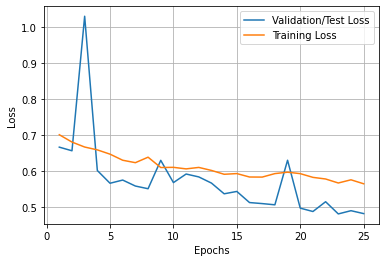

In [8]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
# plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
# plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

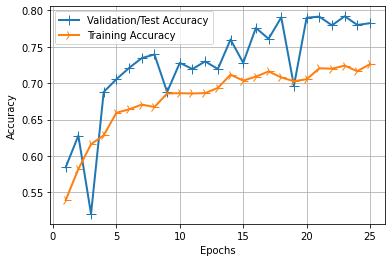

In [9]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\dilip\AppData\Local\Temp\ipykernel_4952\1131787608.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)


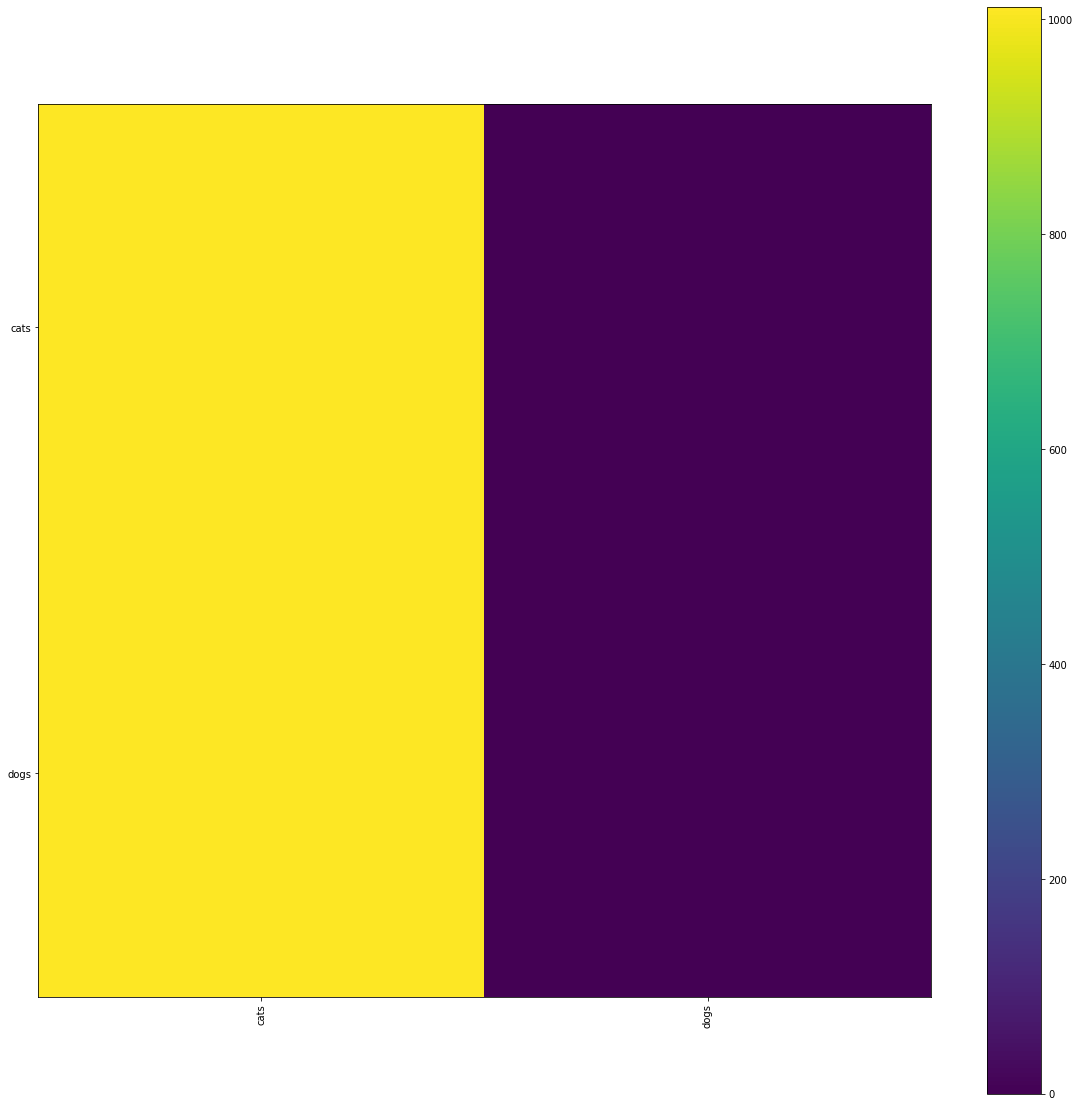

In [10]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 150,150,3


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 8005
nb_validation_samples = 2023

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [11]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
test_image = load_img(r'E:\Porject\image_classification\training_set\training_set\cats\cat.10.jpg',target_size = (150,150,3))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
if result[0][0] == 1:
    print("This is dog")
else:
    print("this is cat")

1/1 [==============================] - 0s 83ms/step
[[1.]]
This is dog
